<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/CreditCardFraudDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Loading the File**

In [ ]:
# General Libraries
import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

# Data Splitting
from sklearn.model_selection import train_test_split

# Data modelling libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Exploratory Data Analysis**

In [ ]:
# No Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


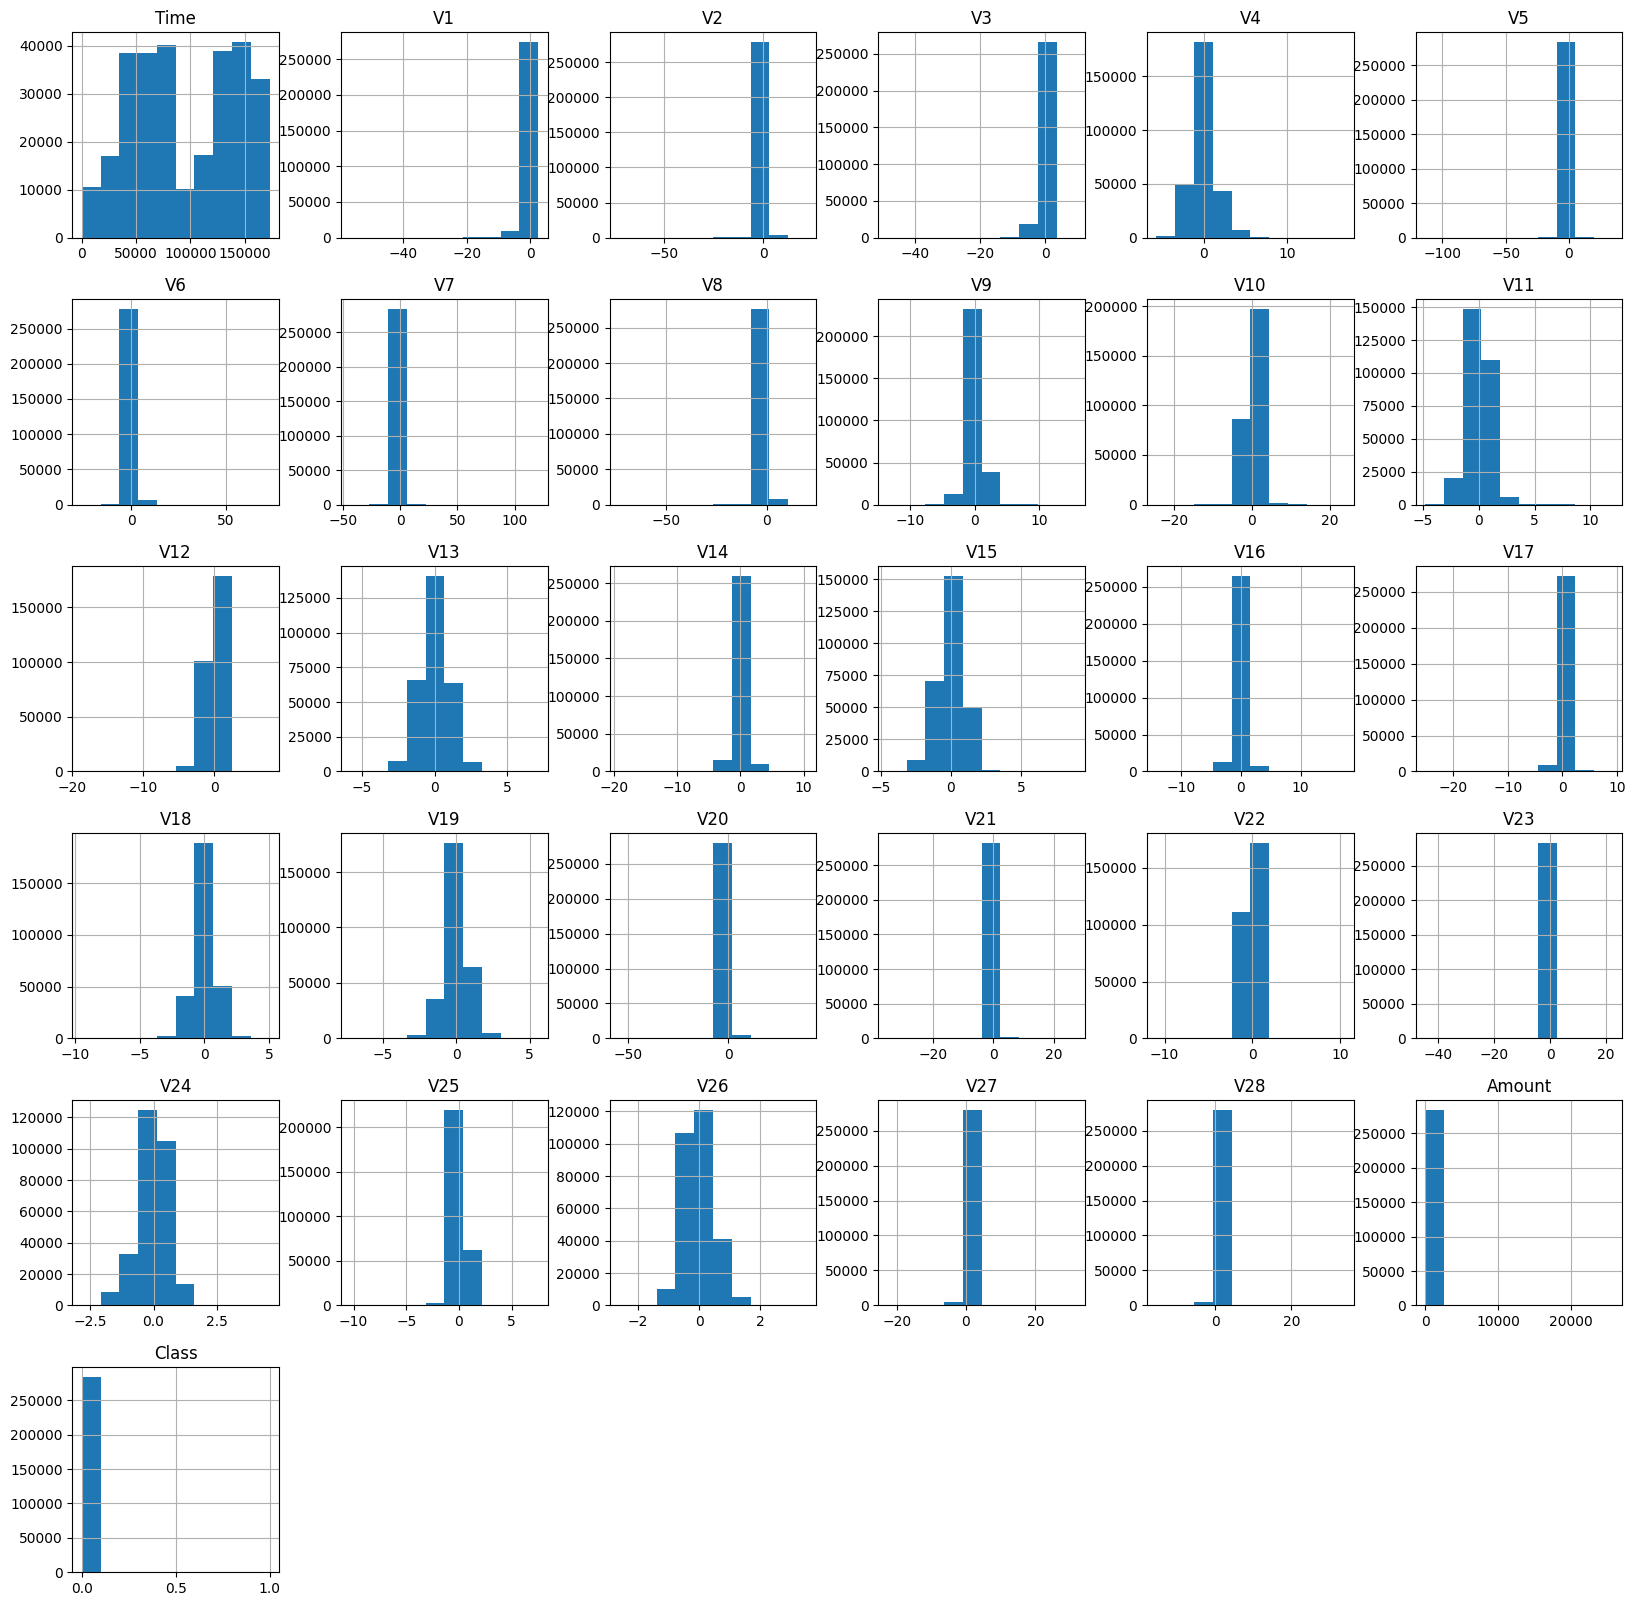

In [ ]:
# ploting histograms to visualize distributions for each column
df.hist(figsize=(20,20))
plt.show()

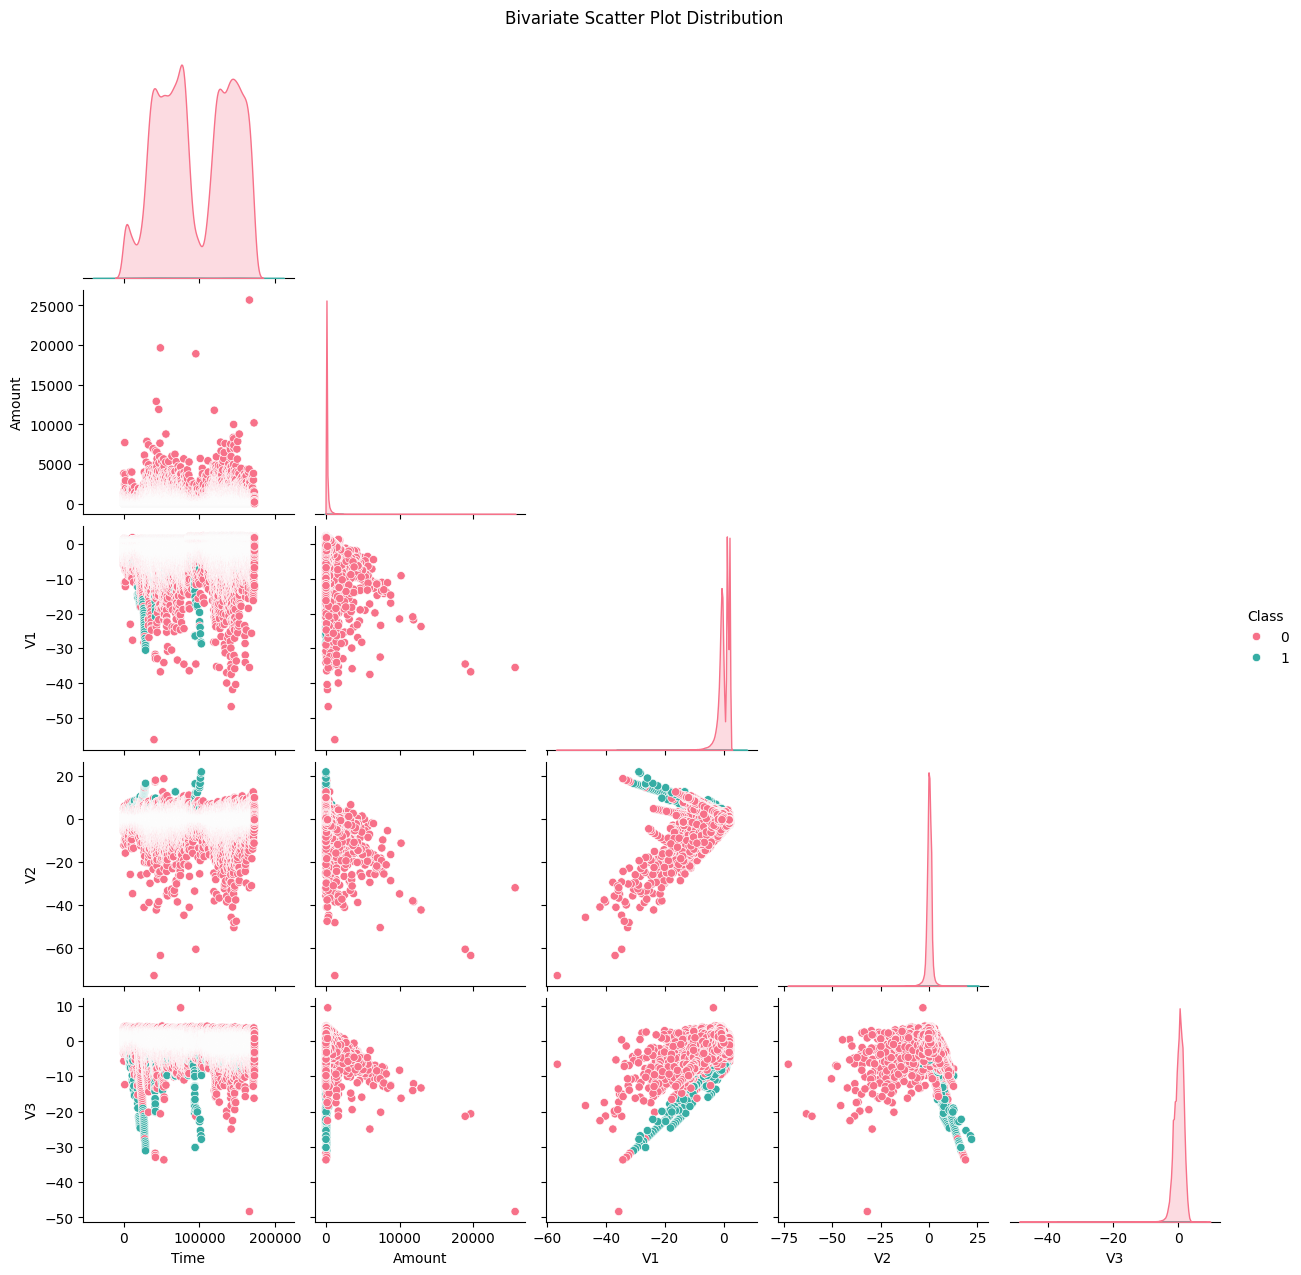

In [ ]:
columns_to_plot = ['Time', 'Amount', 'V1', 'V2', 'V3', 'Class']  # Specify the columns you want to plot
# Pairplot for bivariate scatter plot distributions
sns.pairplot(df[columns_to_plot], diag_kind='kde', hue='Class', palette='husl', corner=True)
plt.suptitle('Bivariate Scatter Plot Distribution', y=1.02)
plt.show()

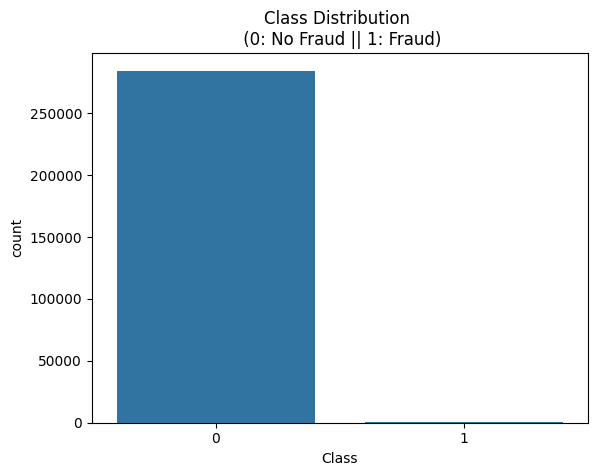

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [ ]:
# plotting barplot for "Class" column to see the class imbalance
sns.countplot(x='Class', data= df)
plt.title("Class Distribution \n (0: No Fraud || 1: Fraud)")
plt.show()

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

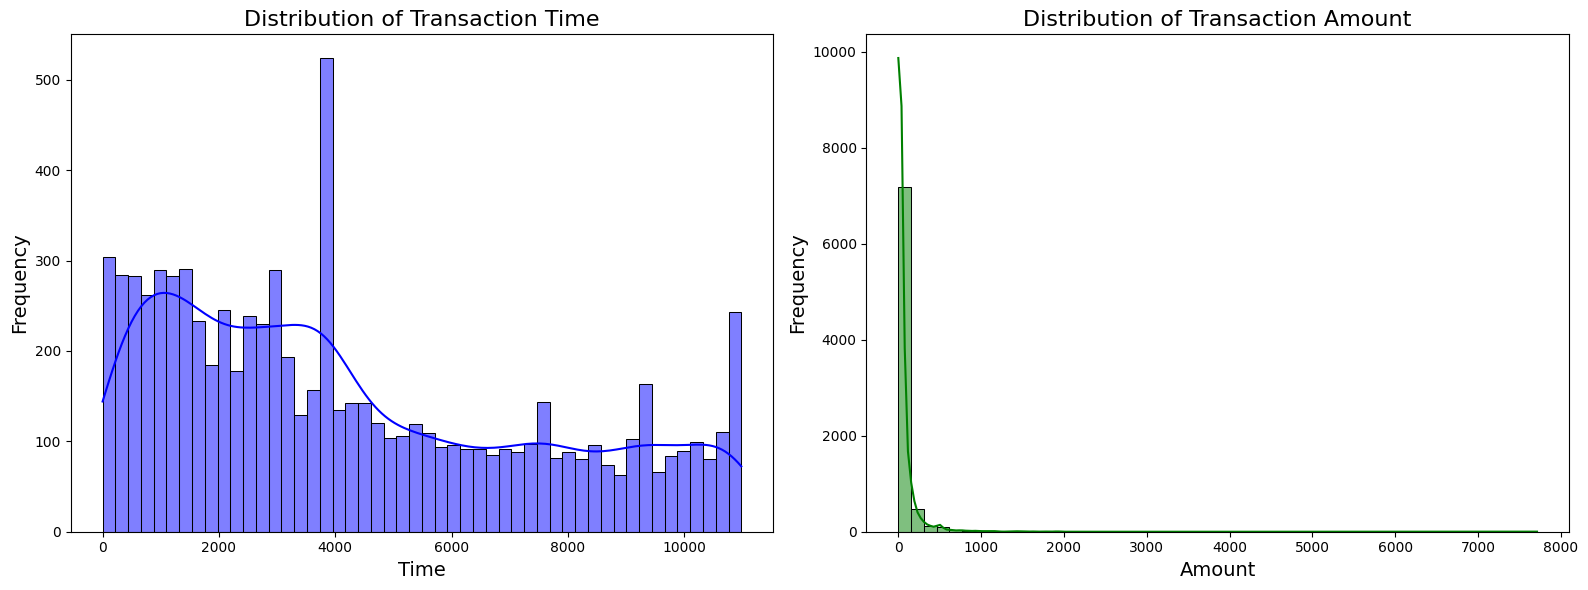

In [ ]:
# Distribution plots for Time and Amount(unscaled columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Plot distribution for 'Time'
sns.histplot(data=df, x='Time', kde=True, bins=50, color='blue', ax=axes[0])
axes[0].set_title('Distribution of Transaction Time', fontsize=16)
axes[0].set_xlabel('Time', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Plot distribution for 'Amount'
sns.histplot(data=df, x='Amount', kde=True, bins=50, color='green', ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount', fontsize=16)
axes[1].set_xlabel('Amount', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# **Feature Scaling**

In [ ]:
# Using robust scaling on Amount column due to the existence of outliers
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Using Min-Max scaling on Time column since its not normally distributed
scaler = MinMaxScaler()
df['Time'] = scaler.fit_transform(df[['Time']])


# **Train and Test set split**

In [ ]:
# Separate features and target variables
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(199364, 30) (85443, 30) (199364,) (85443,)


# **Balancing the dataset using SMOTE**

In [ ]:
# Apply SMOTE to balance the entire dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# After SMOTE
print("Resampled dataset class distribution:", Counter(y_balanced))

# Combine the resampled data into a new DataFrame
sample_df = pd.DataFrame(X_balanced, columns=X_train.columns)
sample_df['Class'] = y_balanced

Resampled dataset class distribution: Counter({0: 199008, 1: 199008})


# **Modelling**

**Random Forest**

In [ ]:
# Random Forest Classifier
model = RandomForestClassifier(criterion='gini')

# Predictions
model.fit(X_balanced, y_balanced)
y_pred = model.predict(X_test)

# Performance Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9995669627705019
Precision: 0.8561151079136691
Recall: 0.875
F1 Score: 0.8654545454545455


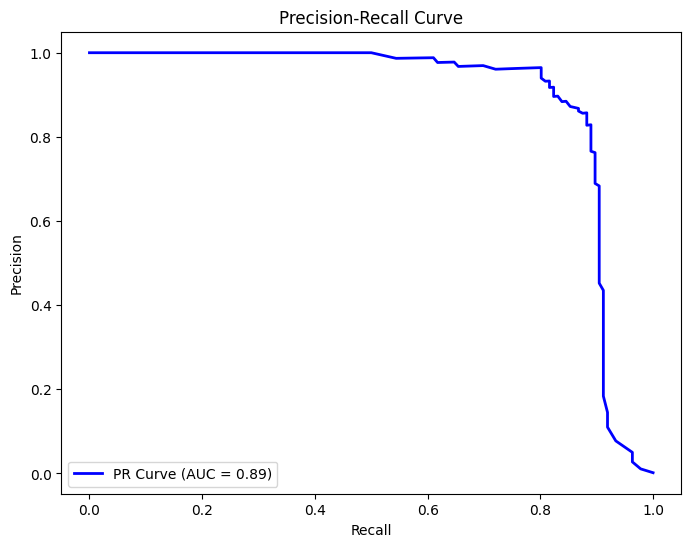

In [ ]:
# Precision-Recall Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

# **Hyperparameter Tuning**

**Randomized search**

In [ ]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 3)
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomizedSearchCV
random_search.fit(X_balanced, y_balanced)

# Best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters:
 {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 71}


In [ ]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 1.00
Precision: 0.78
Recall: 0.88
F1 Score: 0.83
ROC AUC Score: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.88      0.83       136

    accuracy                           1.00     85443
   macro avg       0.89      0.94      0.91     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
 [[85273    34]
 [   16   120]]


# **Confusion Matrix**

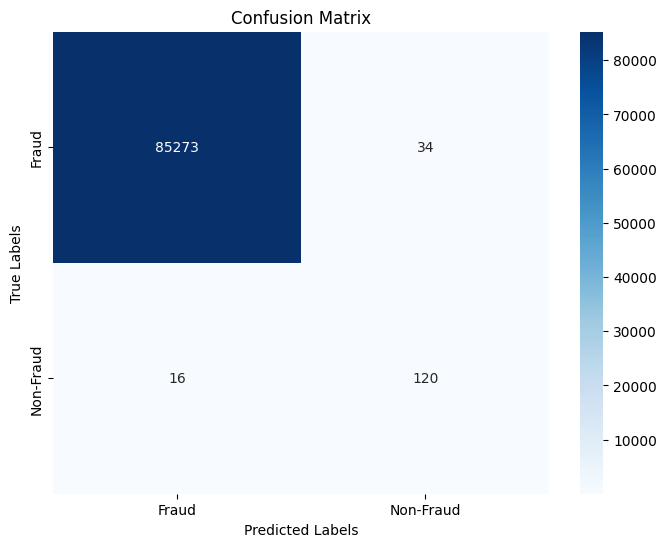

In [ ]:
# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Class names
class_names = ['Fraud', 'Non-Fraud']
# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, class_names)